In [1]:
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


from aare import File

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')

## Read Mönch03 half speed (1 interface)

In [2]:
f = File(base/'Moench03new/cu_half_speed_master_4.json')

print(f'Detector type: {f.detector_type}')
print(f'Total frames: {f.total_frames}')
print(f'Bytes per pixel: {f.bytes_per_pixel}')
print(f'Rows: {f.rows}')
print(f'Cols: {f.cols}')

Detector type: Moench03
Total frames: 500000
Bytes per pixel: 2
Rows: 400
Cols: 400


In [3]:
print(f'The first frame number is: {f.frame_number(0)}')

# Trying to read the last frame number we get an exception, which is correct since some files are missing
try:
    f.frame_number(f.total_frames-1)
except RuntimeError as e:
    print(f'Caught exception: {e}')

The first frame number is: 22377
Caught exception: /home/l_msdetect/erik/aare/aare/src/RawFile.cpp:352:frame_number: Subfile out of range. Possible missing data.


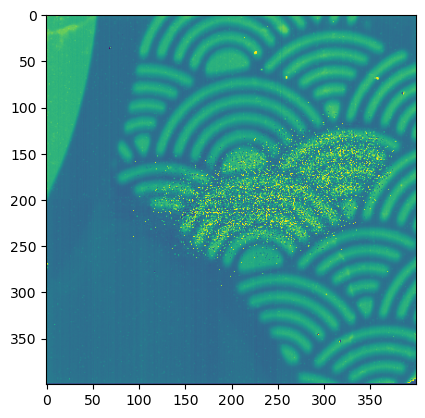

In [4]:
# Read the first frame and plot it
frame = f.read_frame()

fig, ax = plt.subplots()
im = ax.imshow(frame)

The difference between the pedestals is: 0.0


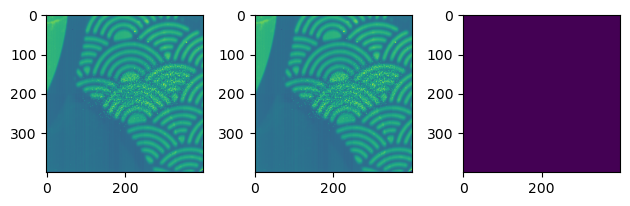

In [5]:
# Easier to see things if we first do pedestal correction
f.seek(0) #go to the first frame

# Memory intensive approach, but not too bad ~320MB
pd0 = f.read_n(1000).mean(axis = 0)

f.seek(0) # Go back to the start 

# Sligthly more elegant but we are looping in python
# can think of implementing it in C++
tmp = np.zeros((f.rows, f.cols), dtype = np.uint64)
for i in range(1000):
    tmp += f.read_frame()
pd1 = tmp/1000

fig, axs = plt.subplots(1,3)
axs[0].imshow(pd0)
axs[1].imshow(pd1)
axs[2].imshow(pd0-pd1)
fig.tight_layout()

print(f'The difference between the pedestals is: {np.abs(pd0-pd1).sum()}')

pd = pd1 # Let's use pd1 from here on

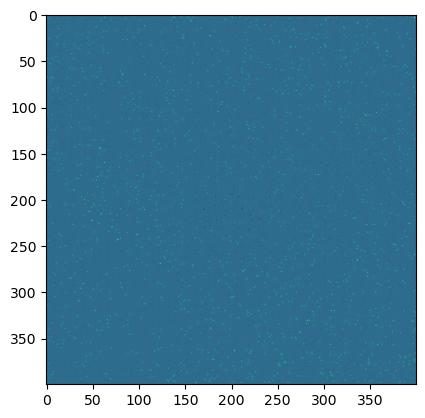

In [6]:
# Now we can better see the X-rays
frame = f.read_frame()-pd
fig, ax = plt.subplots()
im = ax.imshow(frame)

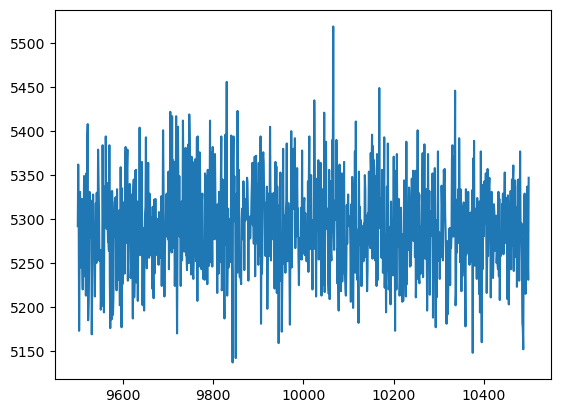

In [7]:
# Read over a file boundry

# We know there are 10k frames per file
f.seek(9500)

y = np.zeros(1000)
x = np.arange(9500,10500)
for i in range(1000):
    y[i] = f.read_frame()[200,200]


fig, ax = plt.subplots()
ax.plot(x,y)

## Read Moench03 full speed (2 interfaces)

Total frames: 486317
Bytes per pixel: 2
Rows: 400
Cols: 400


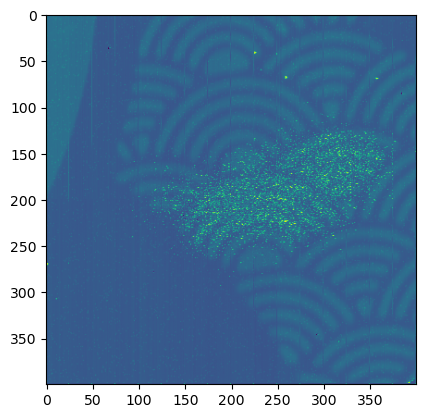

In [8]:
f = File(base/'Moench03new/Cu_HV90_350us_g4_hg_full_speed_np_master_0.json')

print(f'Total frames: {f.total_frames}')
print(f'Bytes per pixel: {f.bytes_per_pixel}')
print(f'Rows: {f.rows}')
print(f'Cols: {f.cols}')

# Actually nothing changes...
frame = f.read_frame()

fig, ax = plt.subplots()
im = ax.imshow(frame)

## Read Moench03 old interface 

Decoding of the old Moench03 also works.
 - Relies on detector type **Moench** and **Analog Samples = 5000**
 - Currently does not work for old .raw master files

Detector type: Moench03_old
Total frames: 1000
Bytes per pixel: 2
Rows: 400
Cols: 400


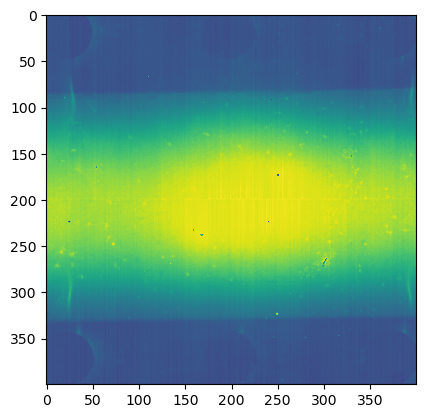

In [9]:
f = File(base/'Moench03old/test_034_irradiated_noise_g4_hg_exptime_2000us_master_0.json')
print(f'Detector type: {f.detector_type}')
print(f'Total frames: {f.total_frames}')
print(f'Bytes per pixel: {f.bytes_per_pixel}')
print(f'Rows: {f.rows}')
print(f'Cols: {f.cols}')
frame = f.read_frame()

fig, ax = plt.subplots()
im = ax.imshow(frame)